                    CMPE 232 TERM PROJECT 
    PROJECT GROUP : A
    GROUP MEMBERS:
            Erol YIGITALP 1162000
            Baris AREM
            Berker ARSLAN 117200033

<a href='#Operation Classes'>Operation Classes:                                                  </a>





<a href='#section2'>Graph Creation                                                               </a>

<a href='#section3'>Basic String to function converter                                           </a>

<a href='#section4'>Forward and Bacward sessions                                                 </a>

<a href='#section5'>Draw Manager for latest outputs                                              </a>

<a href='#section6'>Varaible declerations, Starting operations and Drawing initial function graph</a>

<a href='#section7'>Drawing Forward session                                                       </a>

<a href='#section8'>Drawing Bacward Session                                                       </a>

<a href='#section9'>Function outputs for each node                                                 </a>
<a href='#section10'>Reverse Topologic Order'</a>
<a href='#section11'>Derivatives for each node'</a>
<a href='#section12'>Bacward session List'</a>


In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from sympy import symbols, diff
%matplotlib inline

<a id='Operation Classes'></a>

In [2]:
class Multi:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.neighboors = []
        self.name = None
        self.val = None
        self.der = {}
        self.weight = None
        self.s = str(self.x.name) + '*' + str(self.y.name)
        self.nameG()
    def calc(self):
        self.val = self.x.val * self.y.val
    def derivative(self,X,Y):
        self.der.update({self.x:((self.x.val+X) * self.y.val - self.val)/X})
        self.der.update({self.y:(self.x.val * (self.y.val+X) - self.val)/X})
    def nameG(self):
        self.name = str(self.x.name) + '*' + str(self.y.name)
class Sub:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.weight = None
        self.neighboors = []
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '-' + str(self.y.name)
        self.der = {}
        self.nameG()
    def calc(self):
        self.val = self.x.val - self.y.val
    def derivative(self,X,Y):
        self.der.update({self.x:((self.x.val+X) - self.y.val - self.val)/X})
        self.der.update({self.y:(self.x.val - (self.y.val+X) - self.val)/X})
    def nameG(self):
        self.name = str(self.x.name) + '-' + str(self.y.name)
class Div:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.weight = None
        self.neighboors = []
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '/' + str(self.y.name)
        self.der = {}
        self.nameG()
    def calc(self):
        self.val = self.x.val / self.y.val
    def derivative(self,X,Y):
        self.der.update({self.x:((self.x.val+X) / self.y.val - self.val)/X})
        self.der.update({self.y:(self.x.val / (self.y.val+X) - self.val)/X})
    def nameG(self):
        self.name = str(self.x.name) + '/' + str(self.y.name)
class Add:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.weight = None
        self.neighboors = [] 
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '+' + str(self.y.name)
        self.der = {}
        self.nameG()
    def calc(self):
        self.val = self.x.val + self.y.val
    def derivative(self,X,Y):
            self.der.update({self.x: ((self.x.val+X) + self.y.val - self.val)/X})
            self.der.update({self.y: (self.x.val + (self.y.val+X) - self.val)/X})
    def nameG(self):
        self.name = str(self.x.name) + '+' + str(self.y.name)
class Matmul:
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
        self.weight = None
        self.neighboors = [] 
        self.name = None
        self.val = None
        self.s = str(self.x.name) + '+' + str(self.y.name)
        self.der = {}
        self.nameG()
    def calc(self):
        self.val = np.matmul(np.array(self.x.val),np.array(self.y.val)).tolist()
    def derivative(self,X,Y):
        #self.der = np.divide(np.substract(np.matmul(np.add((np.array([self.val.x]),dtype=float),np.ones(len(self.val),dtype=float)))),np.array(self.y.val)),np.self.val),dtype=float).tolist()
        self.der.update({self.x :np.divide(np.subtract(np.matmul(np.add(np.array(self.x.val),np.ones(len(self.x.val))),np.array(self.y.val)),np.array(self.val)),np.ones(len(self.x.val)))[0]})
        self.der.update({self.y :np.divide(np.subtract(np.matmul(np.add(np.array(self.y.val),np.ones(len(self.x.val))),np.array(self.x.val)),np.array(self.val)),np.ones(len(self.x.val)))[0]})
    def nameG(self):
        self.name = str(self.x.name) + '+' + str(self.y.name)
class PlaceHolder:
    def __init__(self,X):
        self.neighboors = []
        self.name = str(X)
        self.val = None
        self.nodeName = str(X)
        self.der = None
        self.weight = None
        self.nameG()
    def nameG(self):
        self.name = self.name
    def val(self,X):
        self.val = X
    def derivative(self,X):
        self.neighboors[0].derivative(1,X)
        self.der = self.neighboors[0].der
    def appendN(self,Y):
        self.neighboors.append(Y)

<a id='section2'></a>

In [3]:
class Graph :
    def __init__(self):
        self.c = 0
        self.varFirst = []
        self.varSecond = []
        self.op = []
        self.weights =[]
        self.neig={}
        self.data = []
        self.graph = []
        self.drawM = []
        self.lastOp = None
        self.G=None
    def addOperation(self,X,Y,operation):
        self.obj = PlaceHolder(X)
        self.Input = PlaceHolder(Y)
        self.oper=eval(operation)(self.obj,self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
        #self.createFrame()
    def combineOperation(self,opIndex,X,operation):
        self.obj = self.op[opIndex]
        self.Input = PlaceHolder(X)
        self.oper=eval(operation)(self.obj,self.Input)
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
    def combineFull(self,opIndex,X,operation):
        self.obj = self.op[opIndex]
        self.Input = self.op[X]
        self.oper=eval(operation)(self.op[opIndex],self.op[X])
        self.op.append(self.oper)
        self.data.append({'First Variable' : self.obj.name ,'Second Variable' :self.Input.name, 'Operation':operation})
        self.connections(self.obj,self.Input,self.oper)
    def connections(self,X,Y,Z):
        self.graph.append([X,Z,0])
        self.graph.append([Y,Z,0])
        self.drawM.append([X.name,Z.name,0])
        self.drawM.append([Y.name,Z.name,0])
        self.lastOp = Z
    def neighboor(self):
        for s,t,w in self.graph:
            s.neighboors.append(t)
        for s,t,w in self.graph:
            self.neig.update({s:s.neighboors})
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        
        self.graph.append([self.graph[-1][1],PlaceHolder(0),0])
        self.graph[-1][-2].val = 0
        self.drawM.append([self.drawM[-1][1],0,0])
        self.G = nx.DiGraph()
        self.G.add_weighted_edges_from(self.drawM)
        plt.figure(figsize=(10,5))
       
        pos = nx.spring_layout(self.G)  # positions for all nodes
        nx.draw(self.G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(self.G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(self.G,'weight'))
        plt.savefig('Figure%s.png'%(self.c)) 
        self.c+=1

<a id='section3'></a>

In [4]:
class BasicC:
    def __init__(self, string):
        self.G = Graph()
        self.count = 0
        self.z = []
        self.memo = []
        self.s = string
        self.se =''.join(self.s.split())
        self.space =' '.join(self.se)
        self.space = self.space.replace(')', '')
        self.space = self.space.split('(')
        self.final = []
        self.process()
        self.reversed = self.final[::-1]
        print(self.reversed)
        self.framize(True)
        self.G.draw()
        self.G.neighboor()
    def framize(self,boolean):
        try:
            if boolean and len(self.reversed[self.count])>=3:
                self.G.addOperation(self.reversed[self.count][0],self.reversed[self.count][2],self.reversed[self.count][1])
                self.z.append(self.reversed[self.count][:3])
                self.reversed[self.count] = self.reversed[self.count][3:]
                print(len(self.reversed))
                self.framize(False)
            elif (not(self.reversed[self.count] == []) and (len(self.reversed[self.count])>1)):
                self.G.combineOperation(len(self.G.op)-1,self.reversed[self.count][1],self.reversed[self.count][0])
                self.z.append([self.z[-1] , self.reversed[self.count][0],self.reversed[self.count][1]])
                self.reversed[self.count] = self.reversed[self.count][2:]
                self.framize(False)
            elif len(self.reversed[self.count])==1:
                self.G.combineFull(len(self.G.op)-1,self.memo,self.reversed[self.count][0])
                self.z.append([self.z[-1] , self.reversed[self.count][0],self.memo])
                self.reversed[self.count] = []
                self.framize(False)
            else:
                self.count+=1
                self.memo = len(self.G.op)-1
                self.framize(True)
        except:
            print('Finish')
    def process(self):
        for z in self.space:
            self.final.append([])
            for i in z:
                if not(i == ' '):
                    self.final[-1].append(self.helper(''.join(i.split())))
    def helper(self,phase):
        self.phase = phase.translate(str.maketrans({'*': 'Multi', '+': 'Add', '/' : 'Div', '-' : 'Sub','X': 'Matmul'}))
        return self.phase
        

<a id='section4'></a>

In [5]:
class ForwardProp:
    def __init__(self,var,gr):
        self.var = var
        self.index = [s for s,w in self.var]
        self.g = gr
        self.values = []
        self.G = nx.DiGraph()
        self.G.add_weighted_edges_from(self.g.G.graph)
        self.Topologic = None
        self.RTopologic = None
        self.Topologic_Order()
        
    def Topologic_Order(self):
        self.Topologic =list(nx.topological_sort(self.G))
        self.RTopologic =list(reversed(list(nx.topological_sort(self.G))))
    def RTopologic_Order(self):
        self.RTopologic =list(reversed(list(nx.topological_sort(self.G))))
    def addVars(self):
        for i in self.Topologic:
            try:
                string = type(i).__name__
                if string == 'PlaceHolder':
                    i.name = self.var[self.index.index(i.name)][1]
                    i.val = i.name
                    print(i.val)
                else:
                    i.nameG()
                    print(i.name)
            except:
                print(i.name)
    def BackwardSess(self):
        self.values = list(reversed(list(self.values[:-1])))
        self.gradiants = self.values
        self.count = 0
        for i in self.RTopologic[1:]:
            if not (str(type(i).__name__) == 'PlaceHolder'):
                self.last, self.gradiants = self.gradiants[0], self.gradiants[1:]
                i.derivative(1,self.RTopologic[self.count+1])
                i.x.weight = i.der[i.x]
                i.y.weight = i.der[i.y]
                print(i.x.weight)
                print(i.y.weight)
                if i.weight == None:
                    i.weight = 1
            self.count+=1 
    def Forwardsess(self):
        self.addVars()
        for i in self.Topologic[:-1]:
            
                string = type(i).__name__
                if string == 'PlaceHolder':
                    if i.val == None:
                        print(i)
                    else:
                        self.values.append(i.val)
                else:
                    i.calc()
                    print(i.val)
                    self.values.append(i.val)

        self.Topologic[-1].val = self.Topologic[-2].val
        self.values.append(self.values[-1])
        self.RTopologic_Order()
    def info(self):
        self.prM = self.Topologic[:-1]
        return {i.name:i.neighboors for i in self.prM}

<a id='section5'></a>

In [6]:
def draw(drawG, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_weighted_edges_from(drawG)
        plt.figure(figsize=(10,5))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(G,'weight'))

<a id='section6'></a>

[['x', 'Div', 'y', 'Add', 'z'], ['c', 'Multi', 'v', 'Add'], ['a', 'Multi', 'b', 'Multi']]
3
3
3
Finish
5
4
4*5
6
7
7*6
10
9
8
8/9
8/9+10
7*6+8/9+10
4*5*7*6+8/9+10
0
20
42
0.8888888888888888
10.88888888888889
52.888888888888886
1057.7777777777778
52.88888888888869
20.0
1.0
1.0
1.0
1.0
0.11111111111111116
-0.0888888888888888
6.0
7.0
5.0
4.0


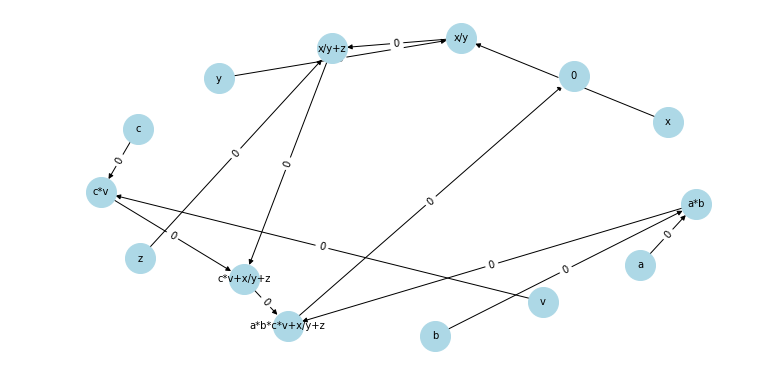

In [7]:
frame = BasicC('a*b*(c*v+(x/y+z))')
liste = [['a',4],['b',5],['x',8],['y',9],['z',10],['c',7],['v',6]]
g = ForwardProp(liste,frame)
g.Forwardsess()
frame.G.neig
g.info()
grap = g.Topologic[:-1]
g.BackwardSess()
x =[[round(i.val,2),round(i.neighboors[0].val,2),round(i.val,2)] for i in grap]

y =[[round(i.neighboors[0].val,2),round(i.val,2),round(i.weight,2)] for i in g.RTopologic[1:]]



<a id='section7'></a>

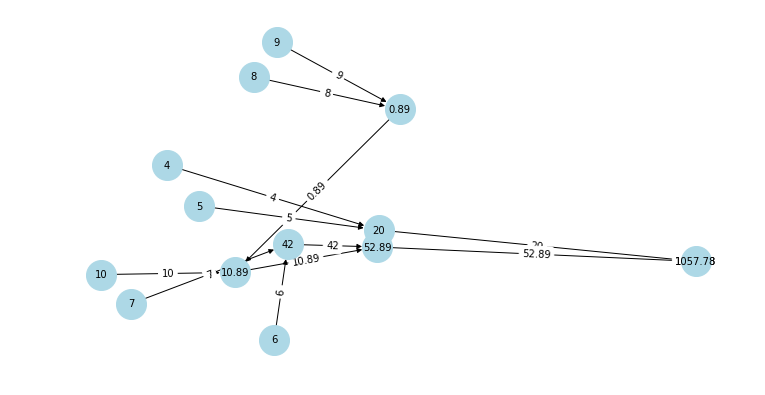

In [8]:
draw(x)

<a id='section8'></a>

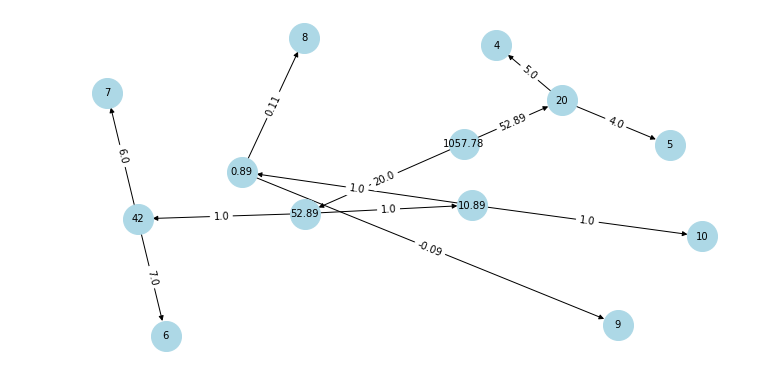

In [9]:
draw(y)

<a id='section9'></a>

In [10]:
g.values[1:]

[52.888888888888886,
 10.88888888888889,
 0.8888888888888888,
 8,
 9,
 10,
 42,
 7,
 6,
 20,
 4,
 5]

<a id='section10'></a>

In [11]:
g.RTopologic

<a id='section11'></a>

In [12]:
g.g.G.weights

[]

<a id='section12'></a>

In [13]:
y

[[1057.78, 1057.78, 1],
 [1057.78, 52.89, 20.0],
 [52.89, 10.89, 1.0],
 [10.89, 0.89, 1.0],
 [0.89, 8, 0.11],
 [0.89, 9, -0.09],
 [10.89, 10, 1.0],
 [52.89, 42, 1.0],
 [42, 7, 6.0],
 [42, 6, 7.0],
 [1057.78, 20, 52.89],
 [20, 4, 5.0],
 [20, 5, 4.0]]

[['z', 'Matmul', 'c'], ['a', 'Matmul', 'b', 'Add']]
2
2
Finish
[2, 2, 2]
[0, 1, 2]
[0, 1, 2]+[2, 2, 2]
[2, 3, 2]
[4, 2, 2]
[4, 2, 2]+[2, 3, 2]
[0, 1, 2]+[2, 2, 2]+[4, 2, 2]+[2, 3, 2]
0
6
18
24
1.0
1.0
7.0
8.0
6.0
3.0


[24, 18, [4, 2, 2], [2, 3, 2], 6, [0, 1, 2], [2, 2, 2]]

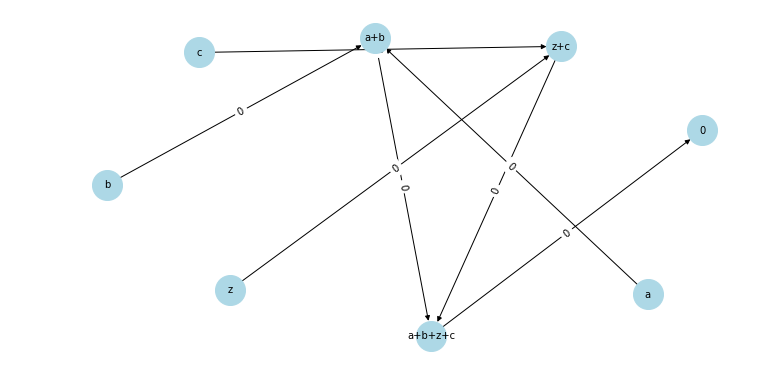

In [14]:
frame1 = BasicC('aXb+(zXc)')
liste1 = [['a',[0,1,2]],['b',[2,2,2]],['c',[2,3,2]],['z',[4,2,2]]]
g1 = ForwardProp(liste1,frame1)
g1.Forwardsess()
g1.BackwardSess()
g1.values


In [15]:
g1.g.G.weights


[]

In [16]:
g1.RTopologic

In [17]:
u =[[str(i.val),str(i.neighboors[0].val),i.val] for i in g1.RTopologic[1:]]
z =[[str(i.neighboors[0].val),str(i.val),i.weight] for i in g1.RTopologic[1:]]



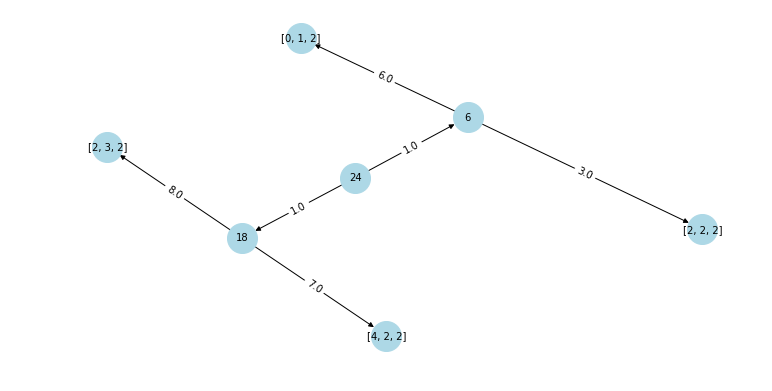

In [18]:
draw(z)

In [19]:
g1.g.G.weights

[]

In [20]:
g1.RTopologic[1].der


{<__main__.Matmul at 0x7f93aef3d668>: 1.0,
 <__main__.Matmul at 0x7f93aef3d588>: 1.0}

In [21]:
z

[['24', '24', 1],
 ['24', '18', 1.0],
 ['18', '[4, 2, 2]', 7.0],
 ['18', '[2, 3, 2]', 8.0],
 ['24', '6', 1.0],
 ['6', '[0, 1, 2]', 6.0],
 ['6', '[2, 2, 2]', 3.0]]

In [22]:
g.RTopologic[-1].neighboors

In [23]:
v = []
for i,o,w in u:
    string = type(w).__name__ 
    print(string)
    if string== 'list':
        w = np.matmul(np.array(w),np.ones(len(w)))
        v.append([i,o,w])
        print(w)
    else:
        v.append([i,o,w])

int
int
list
8.0
list
7.0
int
list
3.0
list
6.0


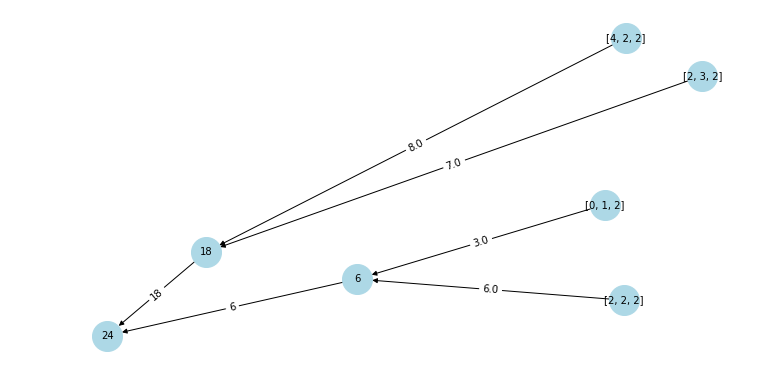

In [24]:
draw(v)